In [1]:
import pandas as pd
import numpy as np

In [12]:
import missingno as msno
import matplotlib.pyplot as plt  # optional, for better control

In [2]:
df = pd.read_csv('complaint_test.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/14/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NC,28206,NaN,Consent not provided,Web,3/14/2020,Closed with explanation,Yes,NaN,3567184
1,5/5/2020,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WI,53714,NaN,Consent not provided,Web,5/5/2020,Closed with explanation,Yes,NaN,3637115
2,7/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,usc section 1681 states that there must be wri...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,31210,NaN,Consent provided,Web,7/19/2019,Closed with explanation,Yes,NaN,3311892
3,4/2/2019,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,NaN,NaN,JPMORGAN CHASE & CO.,GA,30088,NaN,Consent not provided,Web,4/2/2019,Closed with monetary relief,Yes,NaN,3199330
4,7/20/2020,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,PNC Bank will not allow me to link my accounts...,NaN,PNC Bank N.A.,NJ,8043,NaN,Consent provided,Web,7/20/2020,Closed with explanation,Yes,NaN,3754536


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 2223 non-null   object
 1   Product                       2223 non-null   object
 2   Sub-product                   2201 non-null   object
 3   Issue                         2223 non-null   object
 4   Sub-issue                     2049 non-null   object
 5   Consumer complaint narrative  617 non-null    object
 6   Company public response       518 non-null    object
 7   Company                       2223 non-null   object
 8   State                         2201 non-null   object
 9   ZIP code                      2210 non-null   object
 10  Tags                          196 non-null    object
 11  Consumer consent provided?    1246 non-null   object
 12  Submitted via                 2223 non-null   object
 13  Date sent to compa

In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2218    False
2219    False
2220    False
2221    False
2222    False
Length: 2223, dtype: bool

In [6]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)


Categorical columns : ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']


In [10]:
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Numerical columns : ['Complaint ID']


In [8]:
df.isnull().sum()

Date received                      0
Product                            0
Sub-product                       22
Issue                              0
Sub-issue                        174
Consumer complaint narrative    1606
Company public response         1705
Company                            0
State                             22
ZIP code                          13
Tags                            2027
Consumer consent provided?       977
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?              2151
Complaint ID                       0
dtype: int64

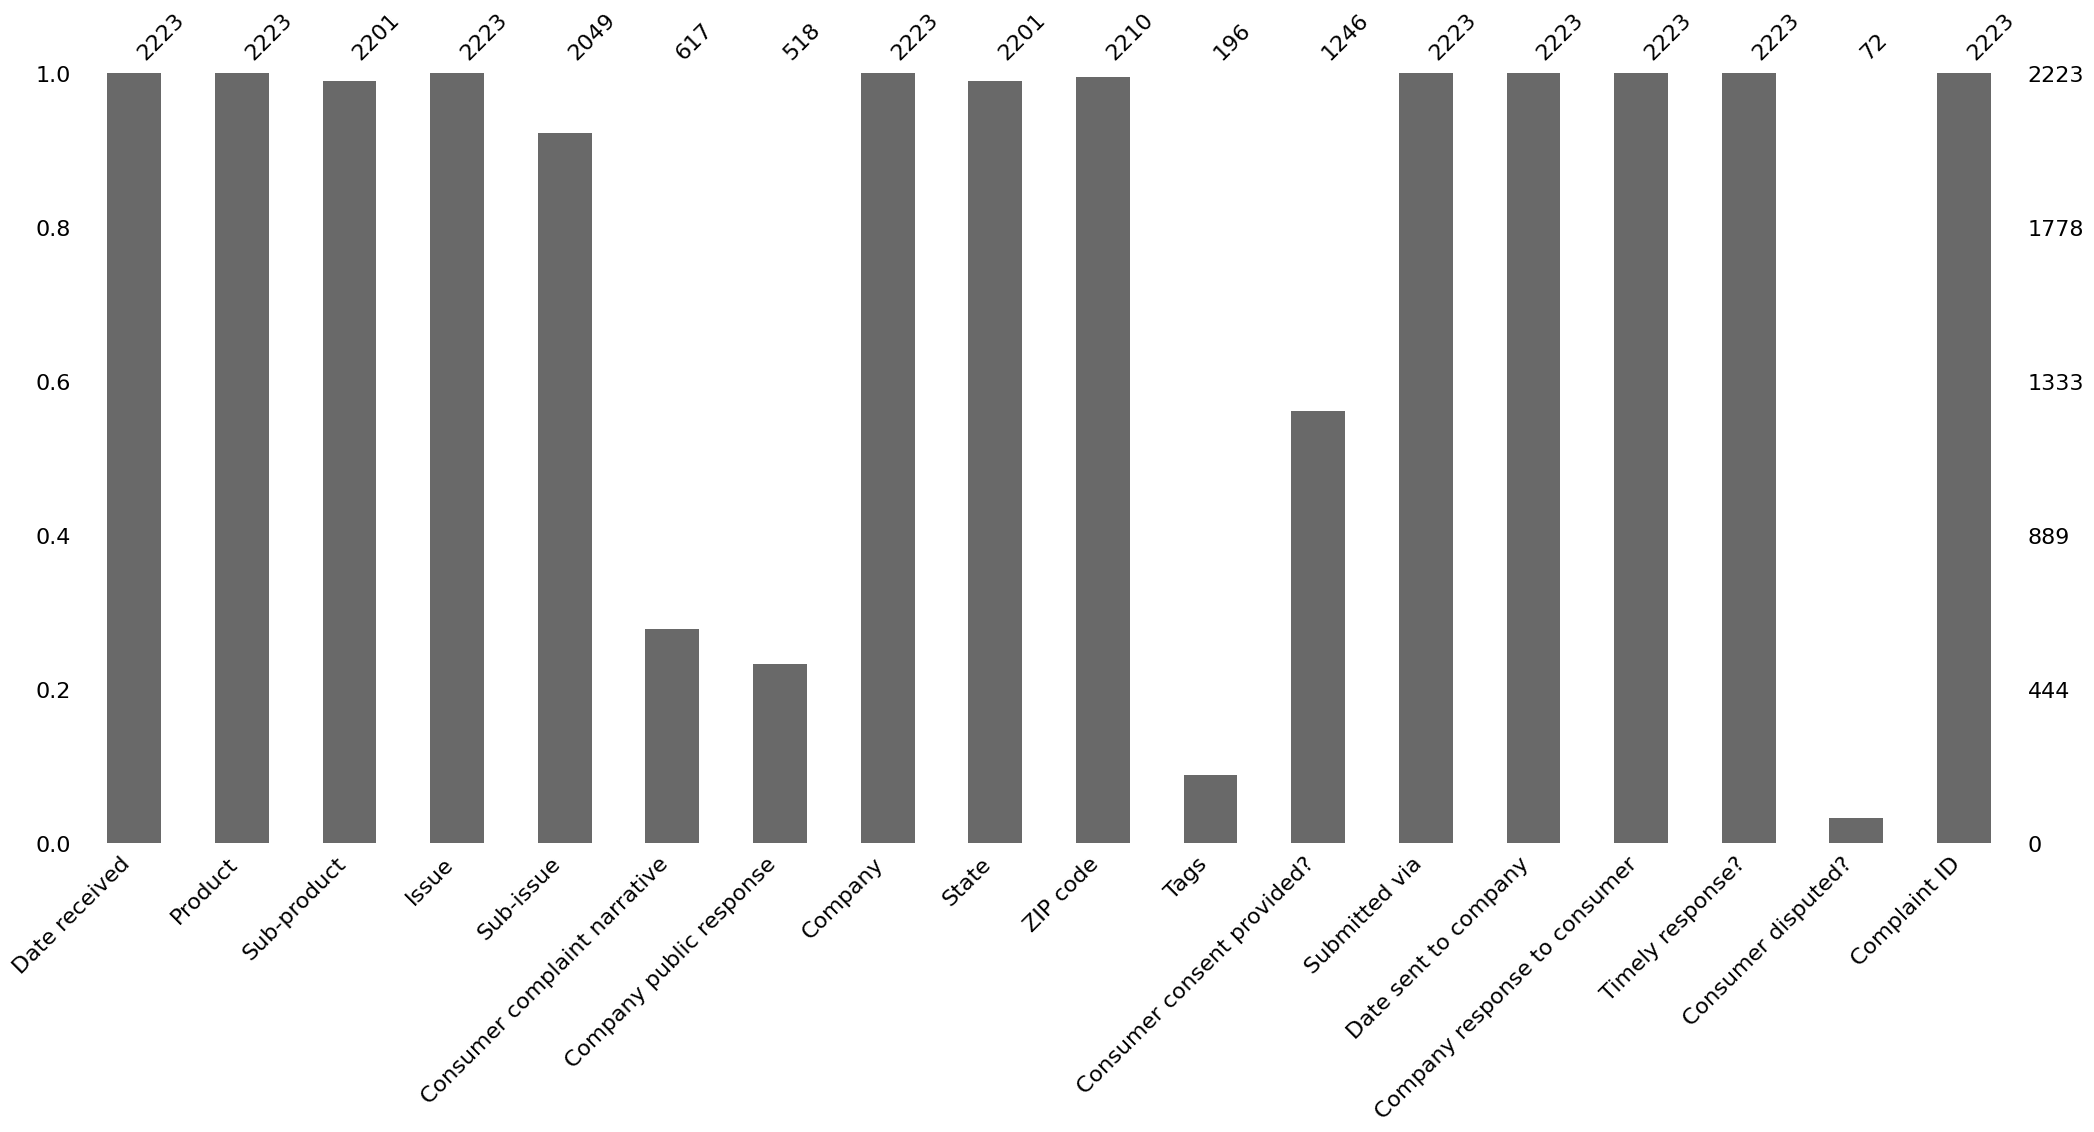

In [15]:
msno.bar(df)
plt.show()

In [17]:
df.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
2219,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
2220,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
2221,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False


In [21]:
round((df.isnull().sum()/df.shape[0])*100,2)

Date received                    0.00
Product                          0.00
Sub-product                      0.99
Issue                            0.00
Sub-issue                        7.83
Consumer complaint narrative    72.24
Company public response         76.70
Company                          0.00
State                            0.99
ZIP code                         0.58
Tags                            91.18
Consumer consent provided?      43.95
Submitted via                    0.00
Date sent to company             0.00
Company response to consumer     0.00
Timely response?                 0.00
Consumer disputed?              96.76
Complaint ID                     0.00
dtype: float64

In [22]:
##Missing values :
# 1. Drop specified columns
columns_to_drop = [
    "Consumer complaint narrative",
    "Company public response",
    "Tags",
    "Consumer consent provided?",
    "Consumer disputed?"
]
df.drop(columns=columns_to_drop, inplace=True)


In [25]:
##Missing values :
# 2. Drop rows where any of the following columns have nulls
columns_with_required_values = ["Issue", "Sub-product", "Sub-issue", "State", "ZIP code"]
df.dropna(subset=columns_with_required_values, inplace=True)


In [26]:
print(df.isnull().sum())

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Complaint ID                    0
dtype: int64


In [27]:
round((df.isnull().sum()/df.shape[0])*100,2)

Date received                   0.0
Product                         0.0
Sub-product                     0.0
Issue                           0.0
Sub-issue                       0.0
Company                         0.0
State                           0.0
ZIP code                        0.0
Submitted via                   0.0
Date sent to company            0.0
Company response to consumer    0.0
Timely response?                0.0
Complaint ID                    0.0
dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 2221
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 2019 non-null   object
 1   Product                       2019 non-null   object
 2   Sub-product                   2019 non-null   object
 3   Issue                         2019 non-null   object
 4   Sub-issue                     2019 non-null   object
 5   Company                       2019 non-null   object
 6   State                         2019 non-null   object
 7   ZIP code                      2019 non-null   object
 8   Submitted via                 2019 non-null   object
 9   Date sent to company          2019 non-null   object
 10  Company response to consumer  2019 non-null   object
 11  Timely response?              2019 non-null   object
 12  Complaint ID                  2019 non-null   int64 
dtypes: int64(1), object(12)

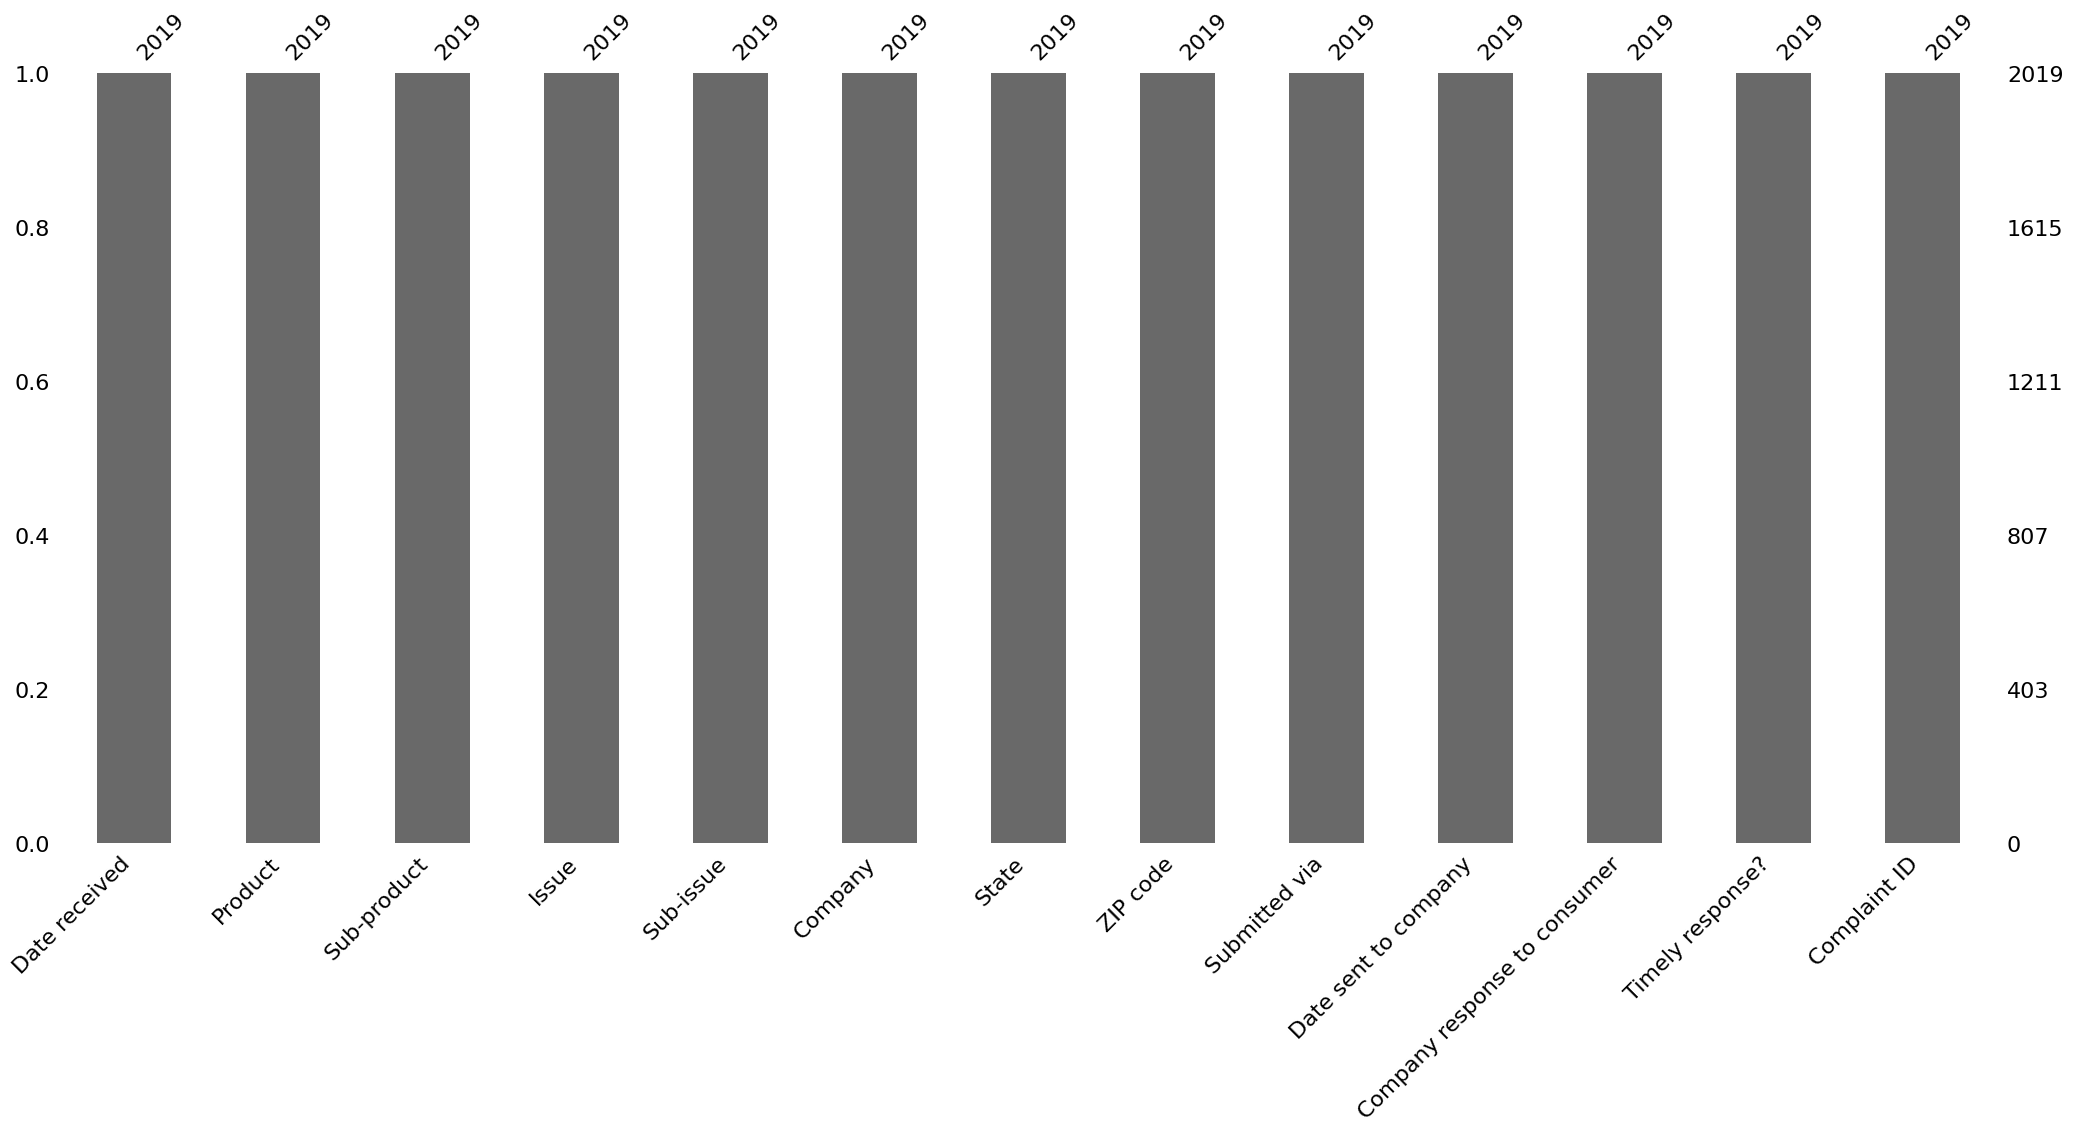

In [29]:
msno.bar(df)
plt.show()

In [30]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,3/14/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",NC,28206,Web,3/14/2020,Closed with explanation,Yes,3567184
2,7/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"CITIBANK, N.A.",GA,31210,Web,7/19/2019,Closed with explanation,Yes,3311892
3,4/2/2019,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,JPMORGAN CHASE & CO.,GA,30088,Web,4/2/2019,Closed with monetary relief,Yes,3199330
4,7/20/2020,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,PNC Bank N.A.,NJ,8043,Web,7/20/2020,Closed with explanation,Yes,3754536
5,6/3/2020,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",TX,77651,Web,6/3/2020,Closed with explanation,Yes,3681305


In [33]:
#Standardize col names 
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_').str.replace('?','')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 2221
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date_received                 2019 non-null   object
 1   product                       2019 non-null   object
 2   sub_product                   2019 non-null   object
 3   issue                         2019 non-null   object
 4   sub_issue                     2019 non-null   object
 5   company                       2019 non-null   object
 6   state                         2019 non-null   object
 7   zip_code                      2019 non-null   object
 8   submitted_via                 2019 non-null   object
 9   date_sent_to_company          2019 non-null   object
 10  company_response_to_consumer  2019 non-null   object
 11  timely_response               2019 non-null   object
 12  complaint_id                  2019 non-null   int64 
dtypes: int64(1), object(12)

In [38]:
#convert date to standard form 

df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'], errors='coerce')


In [39]:
df.head()

,date_received,product,sub_product,issue,sub_issue,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,complaint_id
0,2020-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",NC,28206,Web,2020-03-14,Closed with explanation,Yes,3567184
2,2019-07-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"CITIBANK, N.A.",GA,31210,Web,2019-07-19,Closed with explanation,Yes,3311892
3,2019-04-02,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Money was taken from your account on the wrong...,JPMORGAN CHASE & CO.,GA,30088,Web,2019-04-02,Closed with monetary relief,Yes,3199330
4,2020-07-20,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,PNC Bank N.A.,NJ,8043,Web,2020-07-20,Closed with explanation,Yes,3754536
5,2020-06-03,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",TX,77651,Web,2020-06-03,Closed with explanation,Yes,3681305


In [40]:
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
#zip codes are not numerical they are string : we cant numerate these things 

Numerical columns : ['date_received', 'date_sent_to_company', 'complaint_id']
